In [1]:
### ARQUIVO FINALIZADO ###

In [2]:
### ROTINA DE TRABALHO: ###

# *Cada arquivo contém somente um dado número de pontos (N = 500; 100; 50; 10);
# *Uma distribuição simulada por arquivo, sendo elas: Bimodal Iguais, Bimodal Maior/Menor e Bimodal Menor/Maior;
# *Cada arquivo com 10 valores de SNR, sendo eles: 100.000, 10.000, 1.000, 100, 10, 1;
# *Serão aplicadas as penalizações 'n' (norma), 'g' (gradiente) e 'c' (curvatura) e também a não-negatividade 'nn0';
# *Segundo a lógica proposta, serão 12 arquivos como este, contendo 72 decaimentos analisados no total;

# mg1 = [[1e-3,0.3,1],[1e-1,0.3,1]]
# mg2 = [[1e-3,0.3,1],[1e-1,0.3,0.5]]
# mg3 = [[1e-3,0.3,0.5],[1e-1,0.3,1]]
# Xi = 1e-4; Xf = 1e0
# Manter a densidade de pontos em 1 pt/ms ou 1000 pts/s

#ARQUIVO 50 PTS

In [1]:
import Laplin as lp
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

In [4]:
def FindOpt(ni,nf,Ns,gi,gf,Gs,ci,cf,Cs,reg):
    #Ajuste Grosso
    Bn = (nf/ni)**(1.0/(Ns-1))
    Bg = (gf/gi)**(1.0/(Gs-1))
    Bc = (cf/ci)**(1.0/(Cs-1))
    Min = 1e10
    for i in range(Ns):
        n=ni*Bn**i
        print "Laço ",n," da varredura em Ns."
        for j in range(Gs):
            g=gi*Bg**j
            for k in range(Cs):
                c=ci*Bc**k
                reg.genY([n,g,c],0,'nn0')
                RMS = lp.rmsDiff(sim.Y,reg.Y)
                if RMS < Min:
                    Min = RMS
                    PRes = [RMS,n,g,c]
                    print 'Última otimização do ajuste grosso: ',PRes
    #Ajuste Fino
    Bn = Bn**(1.0/(Ns-1))
    Bg = Bg**(1.0/(Gs-1))
    Bc = Bc**(1.0/(Cs-1))
    for i in range(Ns):
        n=PRes[1]*Bn**i
        print "Laço ",n," da varredura em N."
        for j in range(Gs):
            g=PRes[2]*Bg**j
            for k in range(Cs):
                c=PRes[3]*Bc**k
                reg.genY([n,g,c],0,'nn0')
                RMS = lp.rmsDiff(sim.Y,reg.Y)
                if RMS < Min:
                    Min = RMS
                    PRes = [RMS,n,g,c]
                    print 'Última otimização do ajuste fino: ',PRes
    return PRes

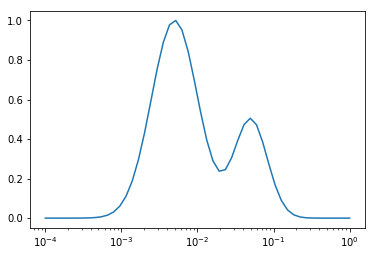

In [2]:
mg = [[5e-3,0.7,1],[5e-2,0.5,0.5]] #[tc, dt, amp]
sim = lp.MultiGauss(mg)
sim.genData(1e-4,1e0,50) #[Xi, Xf, N]
#sim.plotData()

plt.plot(sim.X,sim.Y)
#plt.xlabel('inverse time [s]')
#plt.ylabel('amplitude')
plt.xscale('log')
#plt.grid(True)
#plt.legend(['Dist. Simulada'],loc=0)
plt.savefig('Tabela_Mm_50pt.png',dpi=300)

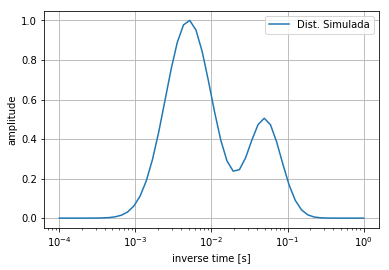

In [5]:
mg = [[5e-3,0.7,1],[5e-2,0.5,0.5]] #[tc, dt, amp]
sim = lp.MultiGauss(mg)
sim.genData(1e-4,1e0,50) #[Xi, Xf, N]
#sim.plotData()

plt.plot(sim.X,sim.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada'],loc=0)
plt.savefig('Sim_Dist_Mm_50pt.png',dpi=300)

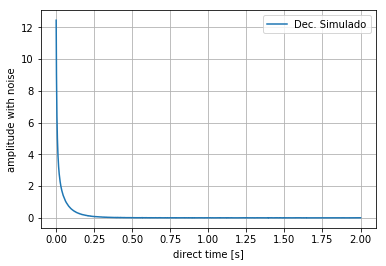

In [6]:
# SNR = 100.000

sig1 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig1.genX(1e-4,2,2000) #xi, xf, N
sig1.genY()
sig1.addGaussNoise(1e5)
#sig1.plotData()

plt.plot(sig1.x,sig1.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e5_Mm_50pt.png',dpi=300)

In [7]:
reg1 = lp.InvLaplace(sig1, 0) #0=cpmg/1=invrec
reg1.genX(1e-4,1e0,50) #Xi, Xf, N

Opt1 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,2,10,reg1)
print Opt1

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [0.5340432265642909, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.3266465869557612, 1e-08, 1e-08, 8.362510309503733e-08]
Última otimização do ajuste grosso:  [0.17089192563103847, 1e-08, 1e-08, 6.993157867655623e-07]
Última otimização do ajuste grosso:  [0.06356445594893514, 1e-08, 1e-08, 5.848035476425729e-06]
Última otimização do ajuste grosso:  [0.02178719218055318, 1e-08, 1e-08, 4.8904256961953734e-05]
Última otimização do ajuste grosso:  [0.007211209906343852, 1e-08, 1e-08, 0.0004089623530229578]
Última otimização do ajuste grosso:  [0.006110454045648861, 1e-08, 1e-08, 0.00341995189335339]


KeyboardInterrupt: 

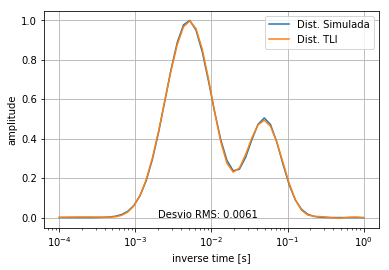

In [8]:
reg1 = lp.InvLaplace(sig1, 0) #0=cpmg/1=invrec
reg1.genX(1e-4,1e0,50) #Xi, Xf, N
reg1.genY([1e-08, 2.0297640459171702e-08, 0.00341995189335339], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg1.plotData()
#plt.show()
#print 'Desvio quadrático médio:', lp.rmsDiff(sim.Y, reg1.Y)

plt.plot(sim.X,sim.Y)
plt.plot(reg1.X,reg1.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0061')
plt.savefig('Sim_Comp_1e5_Mm_50pt.png',dpi=300)

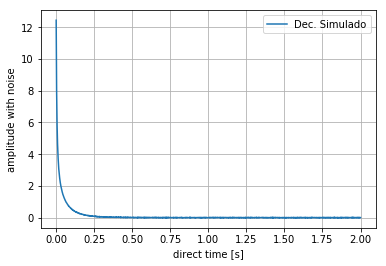

In [9]:
# SNR = 10.000

sig2 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig2.genX(1e-4,2,2000) #xi, xf, N
sig2.genY()
sig2.addGaussNoise(1e4)
#sig2.plotData()

plt.plot(sig2.x,sig2.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e4_Mm_50pt.png',dpi=300)

In [8]:
reg2 = lp.InvLaplace(sig2, 0) #0=cpmg/1=invrec
reg2.genX(1e-4,1e0,50) #Xi, Xf, N

Opt2 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,2,10,reg2)
print Opt2

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [0.63642618122283, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.5577412808408984, 1e-08, 1e-08, 8.362510309503733e-08]
Última otimização do ajuste grosso:  [0.4042646415833403, 1e-08, 1e-08, 6.993157867655623e-07]
Última otimização do ajuste grosso:  [0.18390423910905046, 1e-08, 1e-08, 5.848035476425729e-06]
Última otimização do ajuste grosso:  [0.09912756913487873, 1e-08, 1e-08, 4.8904256961953734e-05]
Última otimização do ajuste grosso:  [0.05460506257002884, 1e-08, 1e-08, 0.0004089623530229578]
Última otimização do ajuste grosso:  [0.028334188047495414, 1e-08, 1e-08, 0.00341995189335339]
Última otimização do ajuste grosso:  [0.012240506344639444, 1e-08, 1e-08, 0.028599382966174536]
Última otimização do ajuste grosso:  [0.012240504412140314, 1e-08, 8.362510309503733e-08, 0.028599382966174536]
Última otimização do ajuste grosso:  [0.012240487569415665, 1e-08, 6.993157867655623e-07, 0.0285993829661745

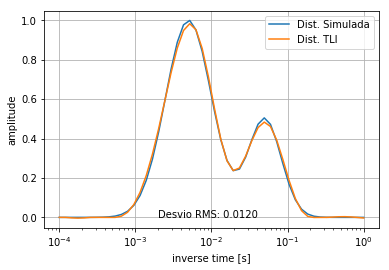

In [10]:
reg2 = lp.InvLaplace(sig2, 0) #0=cpmg/1=invrec
reg2.genX(1e-4,1e0,50) #Xi, Xf, N
reg2.genY([1e-08, 0.0004089623530229578, 0.03621083296484821], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg2.plotData()
#plt.show()
#print 'Desvio quadrático médio:', lp.rmsDiff(sim.Y, reg2.Y)

plt.plot(sim.X,sim.Y)
plt.plot(reg2.X,reg2.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0120')
plt.savefig('Sim_Comp_1e4_Mm_50pt.png',dpi=300)

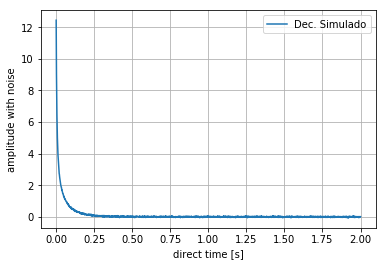

In [11]:
# SNR = 1.000

sig3 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig3.genX(1e-4,2,2000) #xi, xf, N
sig3.genY()
sig3.addGaussNoise(1e3)
#sig3.plotData()

plt.plot(sig3.x,sig3.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e3_Mm_50pt.png',dpi=300)

In [11]:
reg3 = lp.InvLaplace(sig3, 0) #0=cpmg/1=invrec
reg3.genX(1e-4,1e0,50) #Xi, Xf, N

Opt3 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,2,10,reg3)
print Opt3

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [0.8082947384632624, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.805963110574236, 1e-08, 1e-08, 8.362510309503733e-08]
Última otimização do ajuste grosso:  [0.5572460683380364, 1e-08, 1e-08, 6.993157867655623e-07]
Última otimização do ajuste grosso:  [0.4381984606473804, 1e-08, 1e-08, 5.848035476425729e-06]
Última otimização do ajuste grosso:  [0.2268960884988739, 1e-08, 1e-08, 4.8904256961953734e-05]
Última otimização do ajuste grosso:  [0.10717877065782457, 1e-08, 1e-08, 0.0004089623530229578]
Última otimização do ajuste grosso:  [0.032591191617591365, 1e-08, 1e-08, 0.00341995189335339]
Última otimização do ajuste grosso:  [0.019842854812536535, 1e-08, 1e-08, 0.028599382966174536]
Última otimização do ajuste grosso:  [0.019842849549651126, 1e-08, 8.362510309503733e-08, 0.028599382966174536]
Última otimização do ajuste grosso:  [0.019842805533038937, 1e-08, 6.993157867655623e-07, 0.02859938296617453

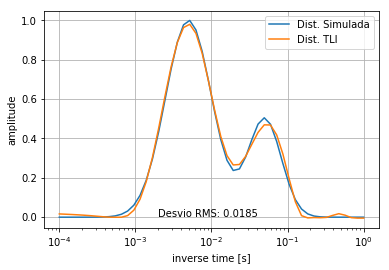

In [12]:
reg3 = lp.InvLaplace(sig3, 0) #0=cpmg/1=invrec
reg3.genX(1e-4,1e0,50) #Xi, Xf, N
reg3.genY([0.0004089623530229578, 0.0004089623530229578, 0.05804999928015703], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg3.plotData()
#plt.show()
#print 'Desvio quadrático médio:', lp.rmsDiff(sim.Y, reg3.Y)

plt.plot(sim.X,sim.Y)
plt.plot(reg3.X,reg3.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0185')
plt.savefig('Sim_Comp_1e3_Mm_50pt.png',dpi=300)

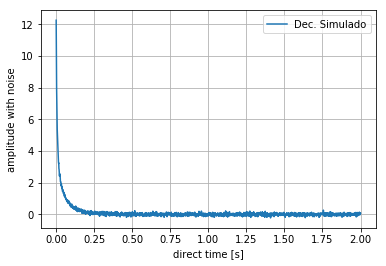

In [13]:
# SNR = 100

sig4 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig4.genX(1e-4,2,2000) #xi, xf, N
sig4.genY()
sig4.addGaussNoise(1e2)
#sig4.plotData()

plt.plot(sig4.x,sig4.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e2_Mm_50pt.png',dpi=300)

In [20]:
reg4 = lp.InvLaplace(sig4, 0) #0=cpmg/1=invrec
reg4.genX(1e-4,1e0,50) #Xi, Xf, N

Opt4 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,10,10,reg4)
print Opt4

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [0.9424881850426918, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.9246099225443003, 1e-08, 1e-08, 9.999999999999998e-08]
Última otimização do ajuste grosso:  [0.8815052232200594, 1e-08, 1e-08, 9.999999999999997e-07]
Última otimização do ajuste grosso:  [0.6340359073510103, 1e-08, 1e-08, 9.999999999999994e-06]
Última otimização do ajuste grosso:  [0.38997785927216555, 1e-08, 1e-08, 9.999999999999992e-05]
Última otimização do ajuste grosso:  [0.2880259530120557, 1e-08, 1e-08, 0.0009999999999999992]
Última otimização do ajuste grosso:  [0.13925092655699697, 1e-08, 1e-08, 0.00999999999999999]
Última otimização do ajuste grosso:  [0.05139813066482951, 1e-08, 1e-08, 0.09999999999999987]
Última otimização do ajuste grosso:  [0.02772135425282608, 1e-08, 1e-08, 0.9999999999999986]
Laço  8.3625103095e-08  da varredura em Ns.
Laço  6.99315786766e-07  da varredura em Ns.
Laço  5.84803547643e-06  da varredura em N

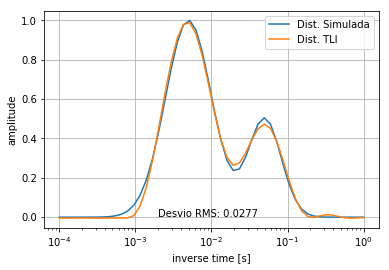

In [14]:
reg4 = lp.InvLaplace(sig4, 0) #0=cpmg/1=invrec
reg4.genX(1e-4,1e0,50) #Xi, Xf, N
reg4.genY([1e-08, 1e-08, 0.9999999999999986], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg4.plotData()
#plt.show()
#print 'Desvio quadrático médio:', lp.rmsDiff(sim.Y, reg4.Y)

plt.plot(sim.X,sim.Y)
plt.plot(reg4.X,reg4.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0277')
plt.savefig('Sim_Comp_1e2_Mm_50pt.png',dpi=300)

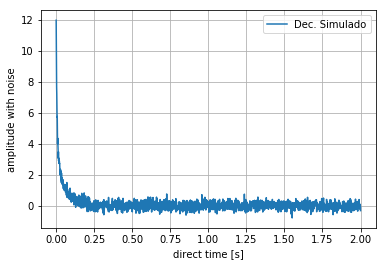

In [15]:
# SNR = 10

sig5 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig5.genX(1e-4,2,2000) #xi, xf, N
sig5.genY()
sig5.addGaussNoise(10)
#sig5.plotData()

plt.plot(sig5.x,sig5.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e1_Mm_50pt.png',dpi=300)

In [16]:
reg5 = lp.InvLaplace(sig5, 0) #0=cpmg/1=invrec
reg5.genX(1e-4,1e0,50) #Xi, Xf, N

Opt5 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,100,10,reg5)
print Opt5

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [0.891214113297607, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.8735292408680245, 1e-08, 1e-08, 2.154434690031883e-05]
Última otimização do ajuste grosso:  [0.35480325905383997, 1e-08, 1e-08, 0.0002782559402207123]
Última otimização do ajuste grosso:  [0.21469535301074785, 1e-08, 1e-08, 0.003593813663804625]
Última otimização do ajuste grosso:  [0.1753995482783247, 1e-08, 1e-08, 0.04641588833612775]
Última otimização do ajuste grosso:  [0.08646302969374449, 1e-08, 1e-08, 0.5994842503189405]
Última otimização do ajuste grosso:  [0.04714206147638817, 1e-08, 1e-08, 7.742636826811262]
Laço  8.3625103095e-08  da varredura em Ns.
Laço  6.99315786766e-07  da varredura em Ns.
Laço  5.84803547643e-06  da varredura em Ns.
Laço  4.8904256962e-05  da varredura em Ns.
Laço  0.000408962353023  da varredura em Ns.
Laço  0.00341995189335  da varredura em Ns.
Última otimização do ajuste grosso:  [0.046237421835633355

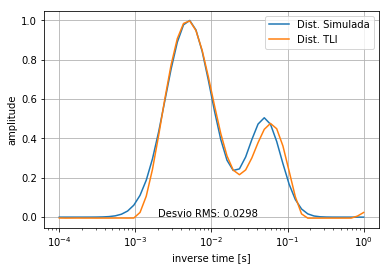

In [16]:
reg5 = lp.InvLaplace(sig5, 0) #0=cpmg/1=invrec
reg5.genX(1e-4,1e0,50) #Xi, Xf, N
reg5.genY([0.03621083296484821, 0.30281346398426073, 1.4065272421052362], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg5.plotData()
#plt.show()
#print 'Desvio quadrático médio:', lp.rmsDiff(sim.Y, reg5.Y)

plt.plot(sim.X,sim.Y)
plt.plot(reg5.X,reg5.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0298')
plt.savefig('Sim_Comp_1e1_Mm_50pt.png',dpi=300)